<a href="https://colab.research.google.com/github/supernova276/spam_detection/blob/main/CustomSpamEmailDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
string.punctuation

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
df=pd.read_csv('/content/spamforNLP.csv')
df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [34]:
df.shape

(5796, 3)

In [35]:
df.isnull().sum()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

In [36]:
df['CATEGORY'].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [37]:
df.isnull().sum()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

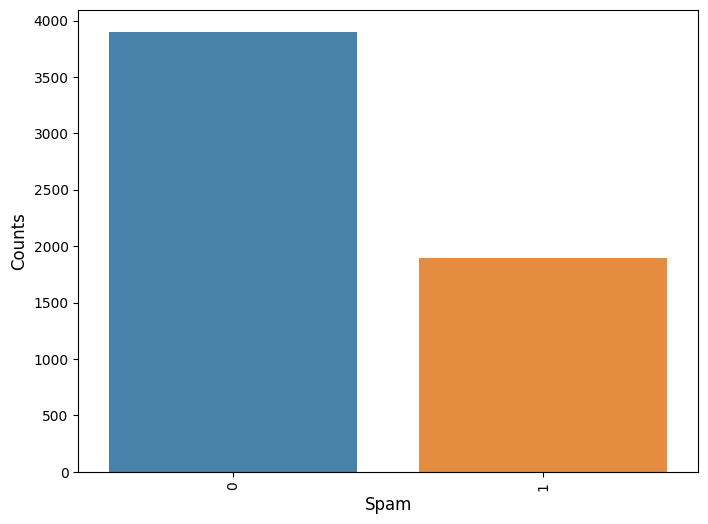

In [38]:
label_counts = df.CATEGORY.value_counts()
plt.figure(figsize = (8,6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [39]:
test="Subject: enron methanol ; meter # : 988291\r\n"

In [40]:
def message_to_tokens(s):
  #removing the pucntuation and tokenize the string
  tokenizer=nltk.RegexpTokenizer(r'\w+')
  tokens=tokenizer.tokenize(s)

  #convert it into smaller case
  tokens=[t.lower() for t in tokens]

  #lemmatize the tokens
  from nltk.stem import WordNetLemmatizer
  Lemmatizer=WordNetLemmatizer()
  lemmatized_tokens=[Lemmatizer.lemmatize(t) for t in tokens]

  #removing stopwords
  useful_tokens=[t for t in lemmatized_tokens if t not in stopwords.words('english')]
  return useful_tokens
message_to_tokens(test)

['subject', 'enron', 'methanol', 'meter', '988291']

In [41]:
#partition the df into test and trainng set
#shuffle the dataset
df=df.sample(frac=1,random_state=1)
df=df.reset_index(drop=True)

split_index=int(len(df)*0.8)
train_df,test_df=df[:split_index],df[split_index:]

train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)

train_df,test_df

(      CATEGORY                                            MESSAGE  \
 0            1  \n\n<HTML><FONT  BACK="#ffffff" style="BACKGRO...   
 1            1  <html><body bgColor="#CCCCCC" topmargin=1 onMo...   
 2            0  Quoting Paul Linehan (plinehan@yahoo.com):\n\n...   
 3            0  <a href=http://www.aaronsw.com/weblog/>\n\nAar...   
 4            0  Oh yeah, the link for more info:\n\n\n\nhttp:/...   
 ...        ...                                                ...   
 4631         0  Gregory Alan Bolcer:\n\n>I'm not sure since I ...   
 4632         1  New Account For: zzzz@spamassassin.taint.org\n...   
 4633         0  >>>>> "O" == Owen Byrne <owen@permafrost.net> ...   
 4634         0  This is an automated response to a message you...   
 4635         0  http://www.ouchytheclown.com/welcome.html\n\n\...   
 
                                    FILE_NAME  
 0     00118.141d803810acd9d4fc23db103dddfcd9  
 1     00463.0bc4e08af0529dd773d9f10f922547db  
 2     00358.8

In [42]:
#count the frequency of different tokens
token_counter={}

for message in train_df['MESSAGE']:
  tokenized_message=message_to_tokens(message)

  for token in tokenized_message:
      if token in token_counter:
        token_counter[token]+=1
      else:
       token_counter[token]=1

len(token_counter)


86415

In [43]:
#find the tokens with the most frequency
def keep_tokens(token,threshold):
  if token not in token_counter:
    return False
  else:
    return token_counter[token]>threshold

In [44]:
#useful words
#these are actually the features with the max frequency
features=set()
for token in token_counter:
  if keep_tokens(token,2000):
    features.add(token)

In [45]:
#construct a list out of these features
features=list(features)

In [46]:
#bags of words model
# we map each token to a  corresponding string
token_to_indexMapping={t:i for t,i in zip(features,range(len(features)))}

In [47]:
#converting a message into a vector
def message_to_vector(message):
  count_vector=np.zeros(len(features))
  processed_list= message_to_tokens(message)

  for token in processed_list:
     if token not in features:
       continue

     index=token_to_indexMapping[token]
     count_vector[index]+=1
  return count_vector


In [48]:
message_to_vector('hi hello how do you do?')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
train_df.iloc[0]

CATEGORY                                                     1
MESSAGE      \n\n<HTML><FONT  BACK="#ffffff" style="BACKGRO...
FILE_NAME               00118.141d803810acd9d4fc23db103dddfcd9
Name: 0, dtype: object

In [50]:
def df_to_Xy(dff):

  y=dff['CATEGORY'].to_numpy().astype(int)
  message_col=dff['MESSAGE']
  count_vectors=[]

  for message in message_col:
    count_vector=message_to_vector(message)
    count_vectors.append(count_vector)
  X=np.array(count_vectors).astype(int)

  return X,y

In [51]:
X_train,y_train=df_to_Xy(train_df)
X_test,y_test=df_to_Xy(test_df)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4636, 80), (4636,), (1160, 80), (1160,))

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train)
X_train,X_test=scaler.transform(X_train),scaler.transform(X_test)
X_train

array([[0.        , 0.09090909, 0.00245851, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01136364, 0.00860479, ..., 0.        , 0.05660377,
        0.00363636],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01886792,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01136364, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01136364, 0.        , ..., 0.        , 0.01886792,
        0.        ]])

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr=LogisticRegression().fit(X_train,y_train)
print(classification_report(y_test,lr.predict(X_test)))


              precision    recall  f1-score   support

           0       0.82      0.99      0.90       788
           1       0.97      0.55      0.71       372

    accuracy                           0.85      1160
   macro avg       0.90      0.77      0.80      1160
weighted avg       0.87      0.85      0.84      1160



In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, lr.predict(X_test))
print(cm)
accuracy_score(y_test,lr.predict(X_test))

[[782   6]
 [166 206]]


0.8517241379310345

<Axes: >

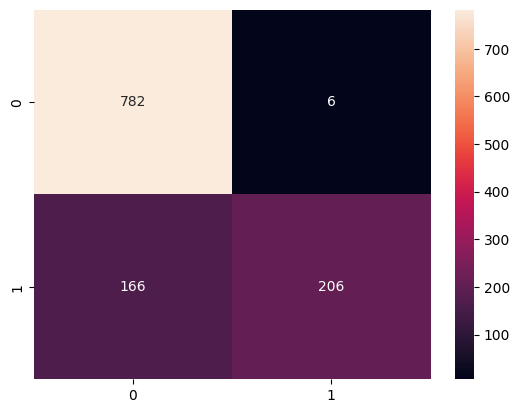

In [55]:
sns.heatmap(cm, annot=True, fmt="d")

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier().fit(X_train,y_train)
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       788
           1       0.90      0.81      0.85       372

    accuracy                           0.91      1160
   macro avg       0.91      0.88      0.89      1160
weighted avg       0.91      0.91      0.91      1160



In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
classifier=SVC(kernel='linear',random_state=0).fit(X_train,y_train)
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       788
           1       0.97      0.57      0.72       372

    accuracy                           0.86      1160
   macro avg       0.90      0.78      0.81      1160
weighted avg       0.88      0.86      0.84      1160



In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
gnb=GaussianNB().fit(X_train,y_train)
print(classification_report(y_test,gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       788
           1       0.94      0.49      0.64       372

    accuracy                           0.83      1160
   macro avg       0.87      0.74      0.76      1160
weighted avg       0.85      0.83      0.81      1160



In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
mnb=MultinomialNB().fit(X_train,y_train)
print(classification_report(y_test,mnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       788
           1       0.99      0.42      0.59       372

    accuracy                           0.81      1160
   macro avg       0.89      0.71      0.73      1160
weighted avg       0.85      0.81      0.78      1160



In [60]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier().fit(X_train,y_train)
print(classification_report(y_test,rc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       788
           1       0.97      0.92      0.94       372

    accuracy                           0.96      1160
   macro avg       0.96      0.95      0.96      1160
weighted avg       0.96      0.96      0.96      1160



In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, rc.predict(X_test))
print(cm)
accuracy_score(y_test,rc.predict(X_test))

[[776  12]
 [ 31 341]]


0.9629310344827586

<Axes: >

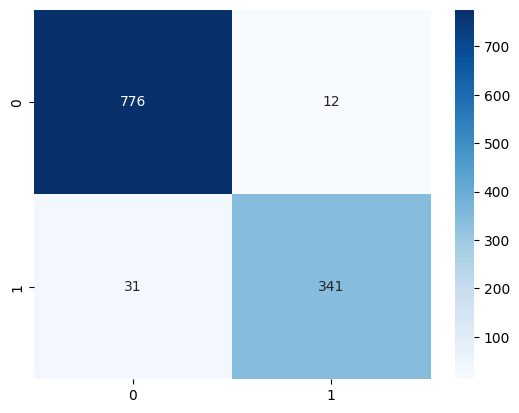

In [62]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues")